In [1]:
# import the necessary libraries
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from skimage.transform import resize
from skimage import io
from skimage.color import rgba2rgb
from tensorflow import keras
from PIL import Image

# define the image path
#img_test_folder_non_treated = r'dataset\pictures\test\128x128\non-treated'
img_test_folder_non_treated = r'dataset\pictures\test\64x64\camera'

#define other properties
font_size = 25
font_color = 'white'
plt.rc('axes', facecolor = '#1e1e1e')
plt.rc('figure', facecolor = '#1e1e1e')
plt.rc('axes', edgecolor = 'w')
plt.rc('xtick', color = 'w')
plt.rc('ytick', color = 'w')
plt.rc('legend', facecolor = 'w')

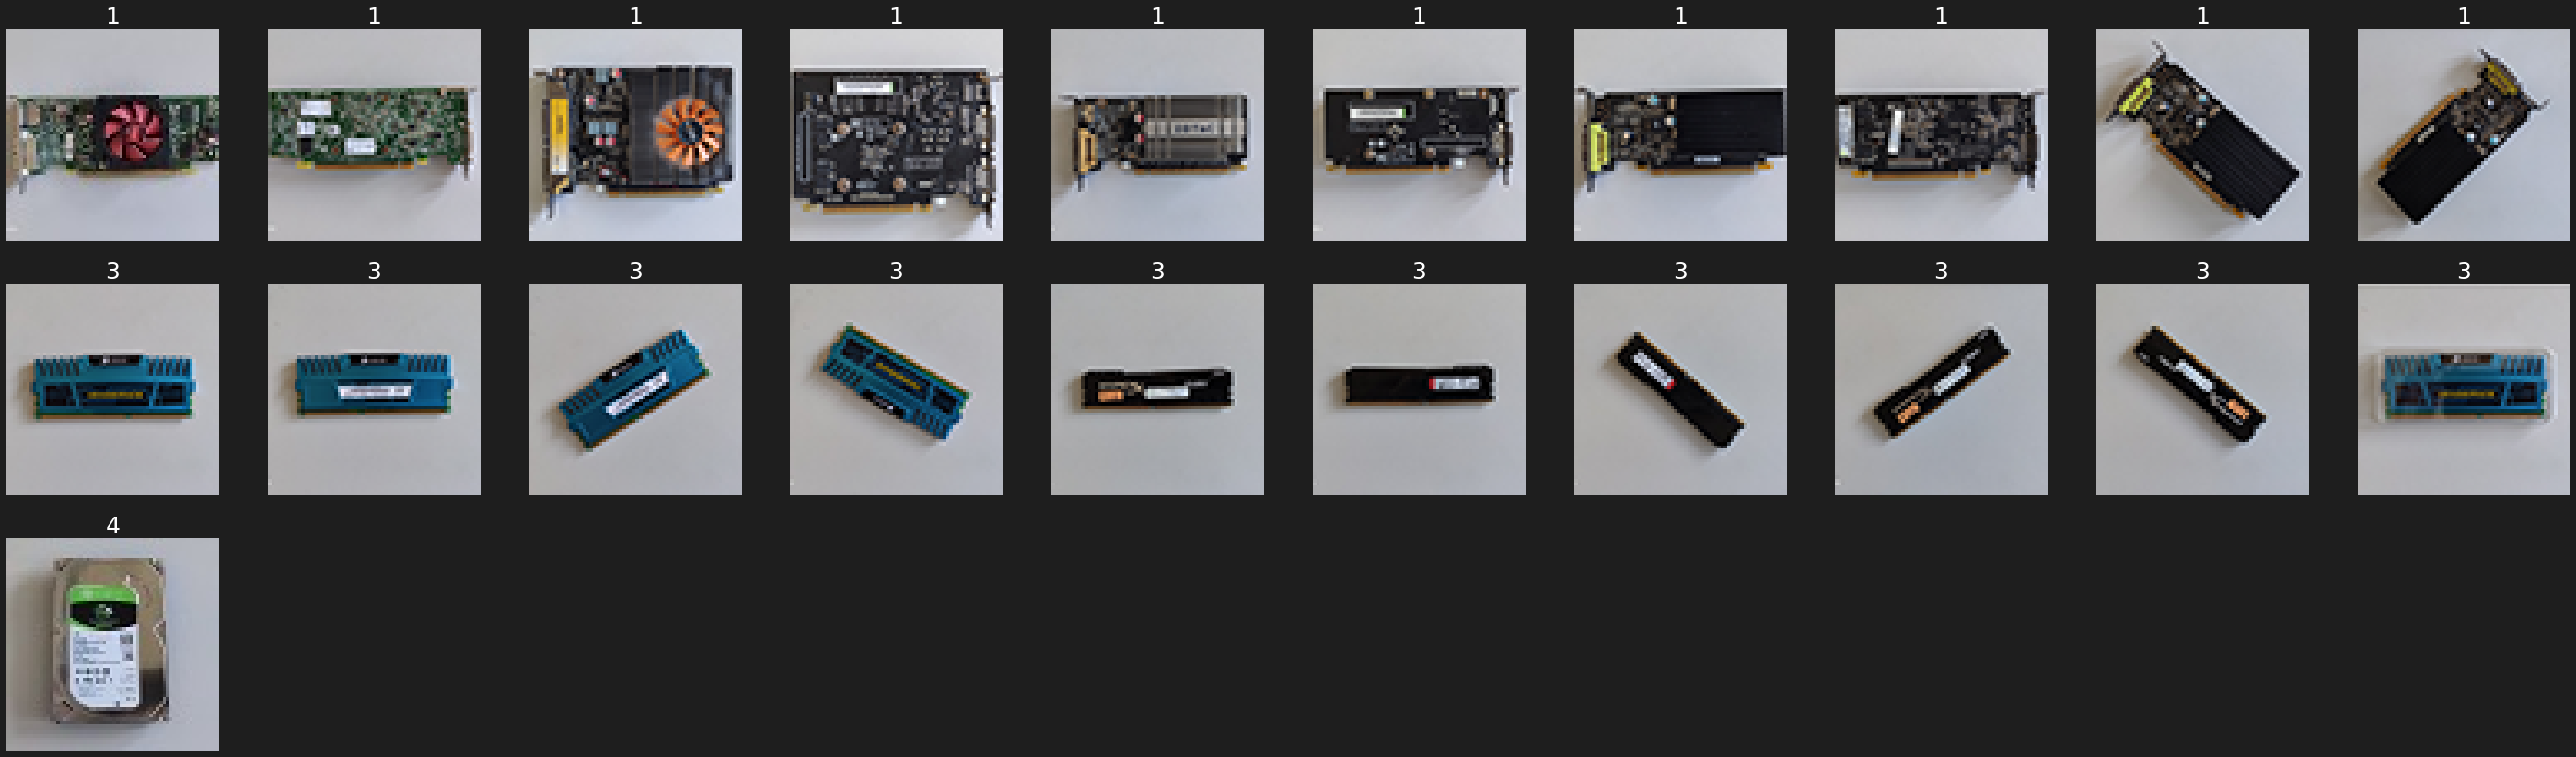

In [2]:
# auxiliary code to visualize the first 10 pictures of each category
plt.figure(figsize = (50,50))
j = 0
counter1 = 0
counter2 = 0

for dir1 in os.listdir(img_test_folder_non_treated):
    for file in os.listdir(os.path.join(img_test_folder_non_treated, dir1)):
        image_path = os.path.join(img_test_folder_non_treated, dir1, file)  
        img = mpimg.imread(image_path)
        ax = plt.subplot(10, 10, j+1)
        ax.title.set_text(file)
        plt.axis('off')
        plt.title(dir1, fontsize = font_size, color = font_color)
        plt.imshow(img)
        j += 1
        counter1 += 1
        if counter1 == 10:
            break
    counter2 += 1
    counter1 = 0
    if counter2 == 7:
        break

In [3]:
# function to gather pictures and generate a numpy array (COLOR)
def create_dataset(img_folder):
   
    counter = 0
    img_data_array = []
    class_name = []
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path = os.path.join(img_folder, dir1, file)
            image = io.imread(image_path, as_gray = False)
            image = np.array(image, dtype = 'float32')  
            image /= 255          
            img_data_array.append(image)
            class_name.append(int(dir1))
            counter += 1
    return img_data_array, class_name, counter

In [4]:
# dataset import
X_array1, y_array1, counter = create_dataset(img_test_folder_non_treated)

X_finalTest = np.array(X_array1)
y_finalTest = np.array(y_array1)

print('testes finais:              ', X_finalTest.shape)

testes finais:               (41, 64, 64, 3)


In [6]:
unique, counts = np.unique(y_finalTest, return_counts = True)
print(dict(zip(unique, counts)))

{1: 20, 3: 20, 4: 1}


In [7]:
# enumerate the classes found
class_names = ['cpu', 'gpu', 'mobo', 'ram', 'hd', 'ssd-sata', 'ssd-m2']

In [8]:
# loads saved neural network
model = keras.models.load_model(r'D:\kevin\OneDrive\Documentos\GitHub\TCC-FURG\modelos\CNN\modelo 6 - CNN - colorido\64x64\cnn16-32-64-128-dnn256-256-eph20\cnn-nadam_eph20_img14336_64x64_70.0%-19.8%-10.2%_run-2022-01-05-23-22-514.h5')

In [9]:
# evaluates the error of the test data
print('erro de teste:    ', model.evaluate(X_finalTest, y_finalTest, verbose = 0))

erro de teste:     [2.39367938041687, 0.5121951103210449]


In [10]:
# probabilities for test instances
y_proba = np.argmax(model.predict(X_finalTest), axis =- 1)
print('previstas: ', np.array(class_names)[y_proba])
print('reais:     ', np.array(class_names)[y_finalTest])

#top_values_index = np.argsort(y_proba, axis = 1)[:,-7:]

previstas:  ['ram' 'gpu' 'hd' 'gpu' 'gpu' 'gpu' 'ram' 'gpu' 'ram' 'gpu' 'gpu' 'mobo'
 'gpu' 'hd' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'ssd-sata'
 'ssd-sata' 'ssd-sata' 'ram' 'ram' 'ssd-sata' 'ssd-sata' 'gpu' 'ssd-m2'
 'ram' 'ram' 'cpu' 'mobo' 'ssd-sata' 'ssd-sata' 'ram' 'ram' 'ram' 'gpu']
reais:      ['gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu'
 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'ram' 'ram' 'ram' 'ram'
 'ram' 'ram' 'ram' 'ram' 'ram' 'ram' 'ram' 'ram' 'ram' 'ram' 'ram' 'ram'
 'ram' 'ram' 'ram' 'ram' 'hd']


In [11]:
# probabilities for the first 20 test instances
X_new = X_finalTest[:20]
y_proba2 = model.predict(X_new)
print(y_proba2.round(2))

[[0.01 0.09 0.   0.83 0.02 0.   0.05]
 [0.   0.97 0.   0.01 0.01 0.   0.01]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.99 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.04 0.96 0.   0.01 0.   0.  ]
 [0.   0.94 0.   0.   0.06 0.   0.  ]
 [0.   0.   0.   0.   0.98 0.02 0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.01 0.57 0.   0.04 0.23 0.12 0.03]
 [0.   1.   0.   0.   0.   0.   0.  ]]


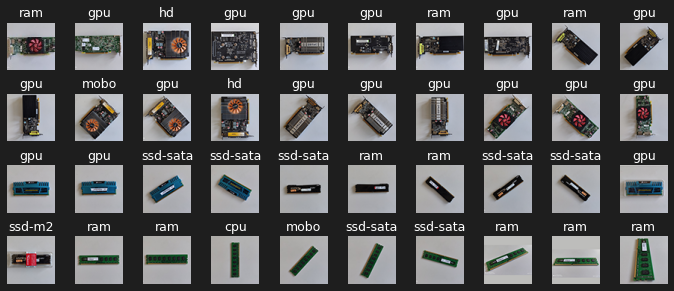

In [12]:
# test dataset evaluation view
n_rows = 4
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_finalTest[index, :, :], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_proba[index]], fontsize = font_size / 2, color = font_color)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

In [ ]:
# exibição das classes com maior probabilidade
for image_index in range(len(X_finalTest)):
    print('imagem #{}'.format(image_index))
    for class_id, name, y_proba in top_values_index[image_index]:
        print('  {} - {:12s} {:.2f}%'.format(class_id, name, y_proba * 100))
    print()